In [132]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
dataset=pd.read_csv(r'Downloads/train.csv')
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [133]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [134]:
#there is some null values in our datasetso we need to cleaned and drop the duplicated 
dataset=dataset.dropna()
dataset= dataset.drop_duplicates()
dataset=dataset.drop(['Loan_ID'],axis =1)
dataset.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [135]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    object 
 1   Married            480 non-null    object 
 2   Dependents         480 non-null    object 
 3   Education          480 non-null    object 
 4   Self_Employed      480 non-null    object 
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    object 
 11  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 48.8+ KB


C:\Users\abdo7\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\abdo7\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\abdo7\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\abdo7\anaconda3\lib\si

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

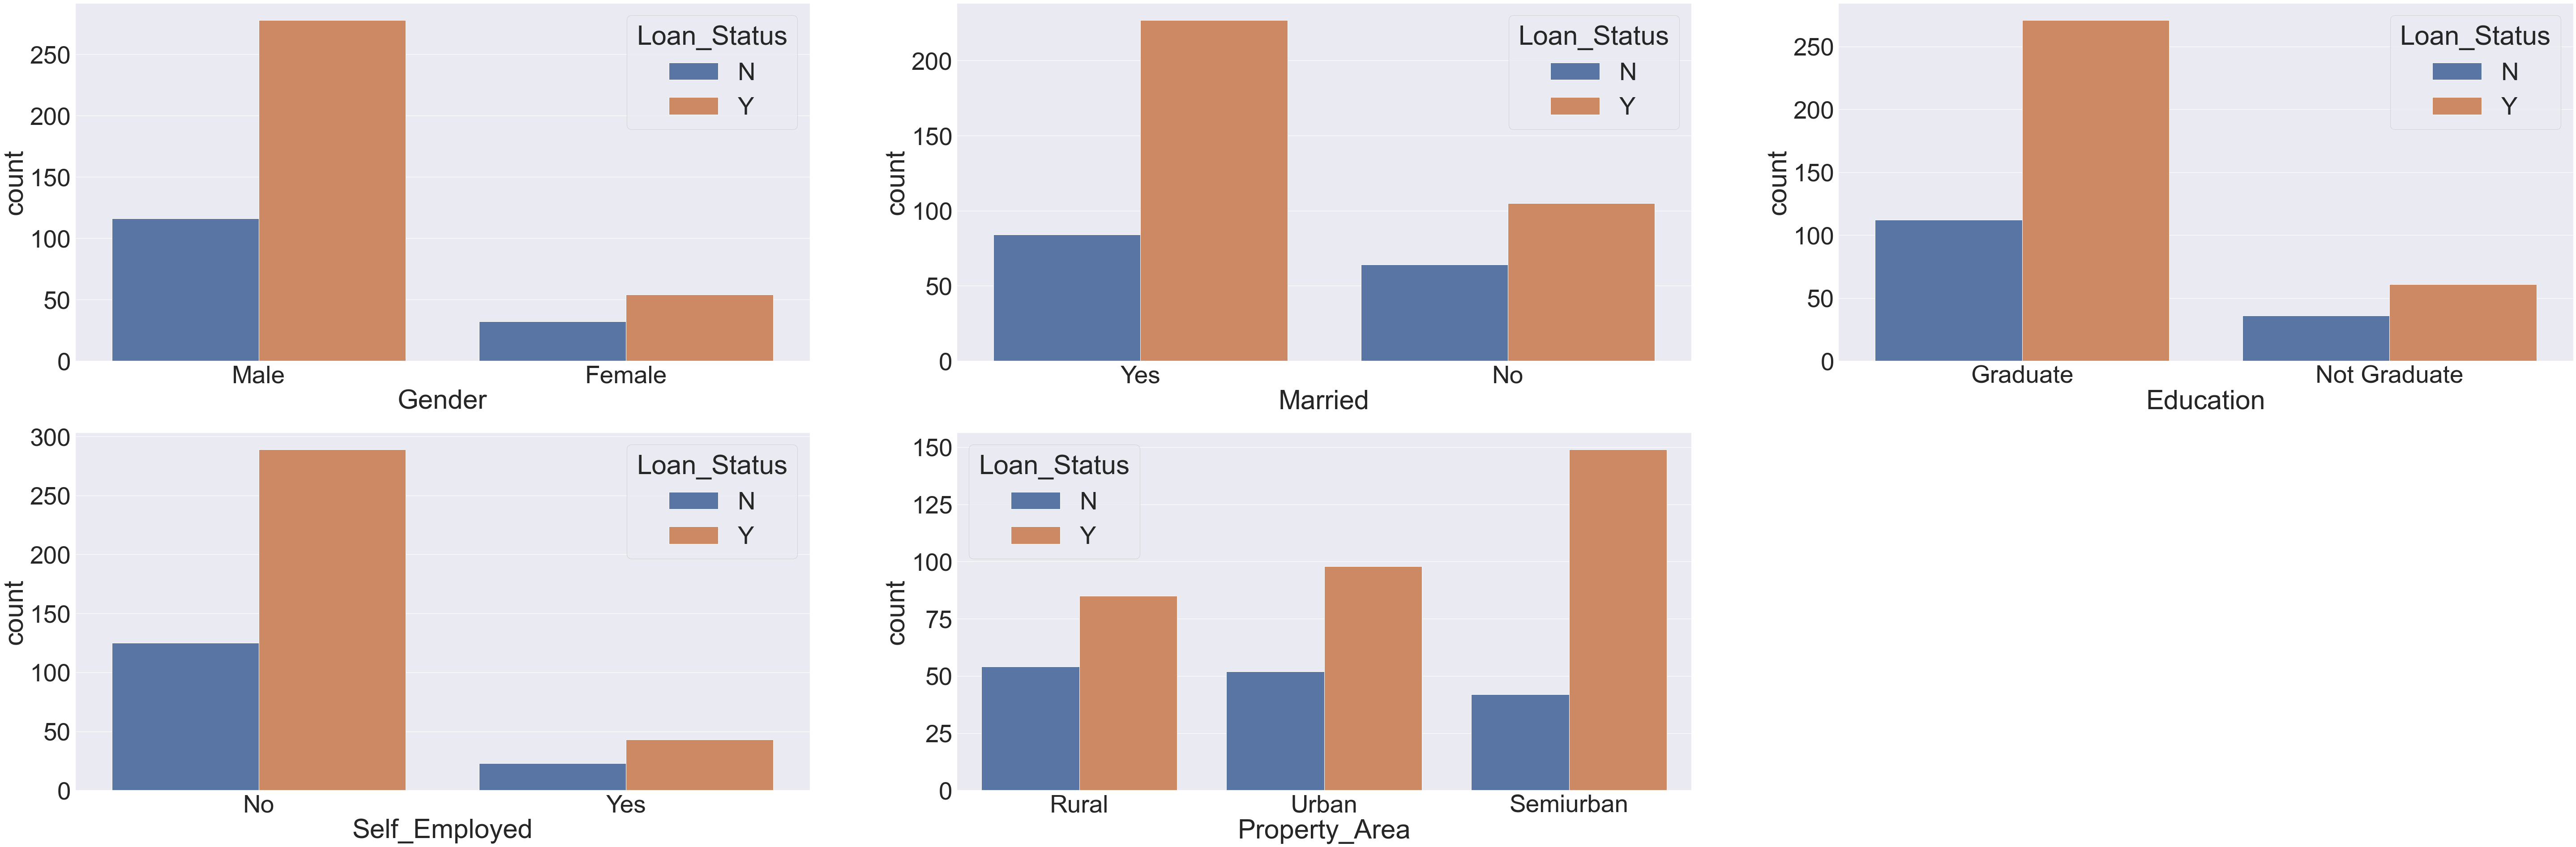

In [136]:
#now let's visualizate the data 
import seaborn as sns
import warnings
plt.figure(figsize = (100, 50))
sns.set(font_scale = 5)
plt.subplot(331)
sns.countplot(dataset['Gender'],hue=dataset['Loan_Status'])

plt.subplot(332)
sns.countplot(dataset['Married'],hue=dataset['Loan_Status'])

plt.subplot(333)
sns.countplot(dataset['Education'],hue=dataset['Loan_Status'])

plt.subplot(334)
sns.countplot(dataset['Self_Employed'],hue=dataset['Loan_Status'])

plt.subplot(335)
sns.countplot(dataset['Property_Area'],hue=dataset['Loan_Status'])

In [137]:
#we can't fit a tring columns to our logestic regression model so we will transforme Gender Education Self employed ... into int values 
dataset['Loan_Status'].replace('Y',1,inplace=True)
dataset['Loan_Status'].replace('N',0,inplace=True)
dataset.Gender=dataset.Gender.map({'Male':1,'Female':0})
dataset.Education=dataset.Education.map({'Graduate':1,'Not Graduate':0})
dataset.Married=dataset.Married.map({'Yes':1,'No':0})
dataset.Dependents=dataset.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
dataset.Self_Employed=dataset.Self_Employed.map({'Yes':1,'No':0})
dataset.Property_Area=dataset.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})
dataset

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


In [138]:
#now after explore th data set we need to build a model that predict if the person loan or not 
#its binary classification so we can use logistic regression algorithmes 
array = dataset.values
dataset.shape

(480, 12)

In [139]:
#first of all deviding the data into inpute and output and train and test 
x=array[:,0:10]
y=array[:,11]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.3,random_state=1)

In [141]:
#builde the model 
from sklearn.metrics import accuracy_score
model=LogisticRegression()
model.fit(x_train,y_train)
prediction = model.predict(x_test)
accuracy=accuracy_score(y_test , prediction)
accuracy

C:\Users\abdo7\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8035714285714286

In [ ]:
# how to make this machine learn from the old experiance and change her own model ? still don't know